 #    <div align =center >Early Stage Diabetes Risk Prediction

**Diabetes** is a disease that occurs when your blood glucose, also called<font color =red> blood sugar, is too high</font>. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.

![Diabetws](whd2016-diabetes-infographic-v2-page-1.png "Title")

### Data Set Information:

This has been collected using direct questionnaires from the patients of Sylhet Diabetes
Hospital in Sylhet, Bangladesh and approved by a doctor.
Data Set Information:

This has been collected using direct questionnaires from the patients of Sylhet Diabetes
Hospital in Sylhet, Bangladesh and approved by a doctor.
Attribute Information:

    Age 1.20-65
    Sex 1. Male, 2.Female
    Polyuria 1.Yes, 2.No.
    Polydipsia 1.Yes, 2.No.
    sudden weight loss 1.Yes, 2.No.
    weakness 1.Yes, 2.No.
    Polyphagia 1.Yes, 2.No.
    Genital thrush 1.Yes, 2.No.
    visual blurring 1.Yes, 2.No.
    Itching 1.Yes, 2.No.
    Irritability 1.Yes, 2.No.
    delayed healing 1.Yes, 2.No.
    partial paresis 1.Yes, 2.No.
    muscle stiness 1.Yes, 2.No.
    Alopecia 1.Yes, 2.No.
    Obesity 1.Yes, 2.No.
    Class 1.Positive, 2.Negative.
    
    
 Kaggle : https://www.kaggle.com/ishandutta/early-stage-diabetes-risk-prediction-dataset

---


**Polyuria** is a condition where the body urinates more than usual and passes excessive or abnormally large amounts of urine each time you urinate. Polyuria is defined as the frequent passage of large volumes of urine – more than 3 litres a day compared to the normal daily urine output in adults of about 1 to 2 litres.

**Polydipsia** is a medical name for the feeling of extreme thirstiness. Polydipsia is often linked to urinary conditions that cause you to urinate a lot. This can make your body feel a constant need to replace the fluids lost in urination. It can also be caused by physical processes that cause you to lose a lot of fluid.

**Genital** Thrush (or candidiasis) is a common condition caused by a type of yeast called Candida. It mainly affects the vagina, though may affect the penis too, and can be irritating and painful. Many types of yeast and bacteria naturally live in the vagina and rarely cause problems.

**Partial Paresis** Paresis involves the weakening of a muscle or group of muscles. It may also be referred to as partial or mild paralysis. Unlike paralysis, people with paresis can still move their muscles. These movements are just weaker than normal.

**Polyphagia** also known as hyperphagia, is the medical term for excessive or extreme hunger. It's different than having an increased appetite after exercise or other physical activity. While your hunger level will return to normal after eating in those cases, polyphagia won't go away if you eat more food.

**Alopecia** Areata is a condition that causes hair to fall out in small patches, which can be unnoticeable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
#To center plots

In [3]:
df = pd.read_csv("diabetes_data_upload.csv")
df1 = df.copy()
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

<font color =green>There are no null values</font>

---

###  Dataset Pre-Processing

In [5]:
df["Gender"]=df["Gender"].replace({"Male":0,"Female":1})
df['class']=df['class'].replace({'Positive':1,'Negative':0})
for col in df.columns:
    if col not in ["Age","Gender","class"]:
        df[col]=df[col].replace({'Yes':1,'No':0})
def age(i):
    for x in range(10,100,10):
        if i < x:
            la = f'{x-10}-{x}'
            return la
            break
df1['Age Group'] = df1['Age'].apply(lambda x:age(x))

In [6]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


# <div align =center> EDA </div>

---

   ## <div align =center>Distribution of Data</div>

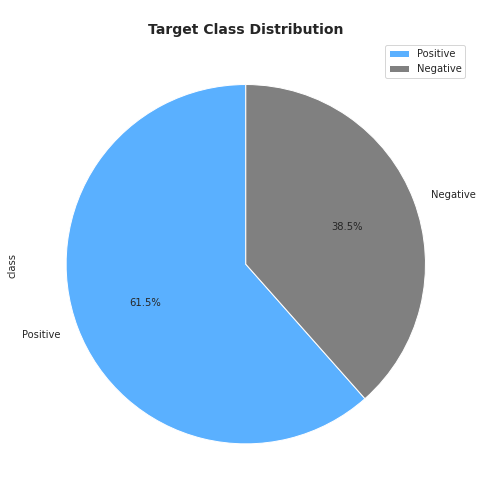

In [7]:
# green="#5bb46c"
# red="#e4564a"
red="#ff8c94"
blue="#5ab0ff"
green="#99ff99"
green='#63ee33'
red="#ee3338"
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
df["class"].value_counts().plot(kind="pie",colors=[blue,'grey'],legend=True,labels=["Positive","Negative"],
                               startangle=90,autopct='%1.1f%%')
plt.title('\nTarget Class Distribution',fontweight='bold',fontsize=14)
plt.tight_layout()
plt.show()

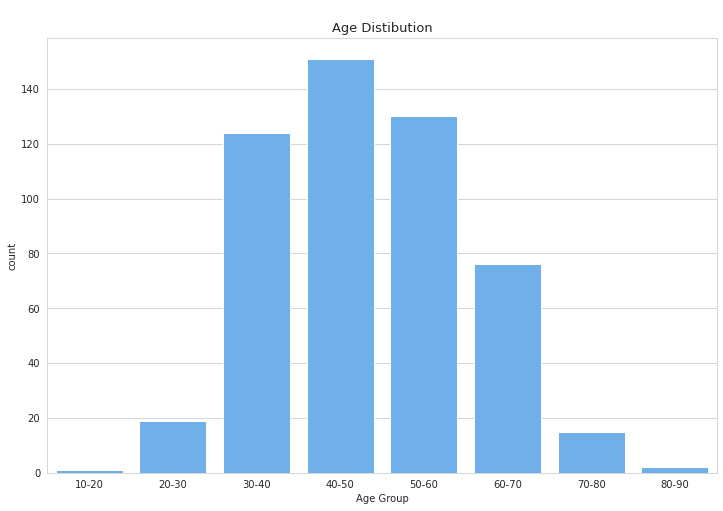

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x='Age Group', data=df1, color= blue,order=['10-20', '20-30', '30-40', '40-50', 
                                                               '50-60', '60-70', '70-80', '80-90'])
plt.title("\nAge Distibution",fontsize=13)
plt.show()

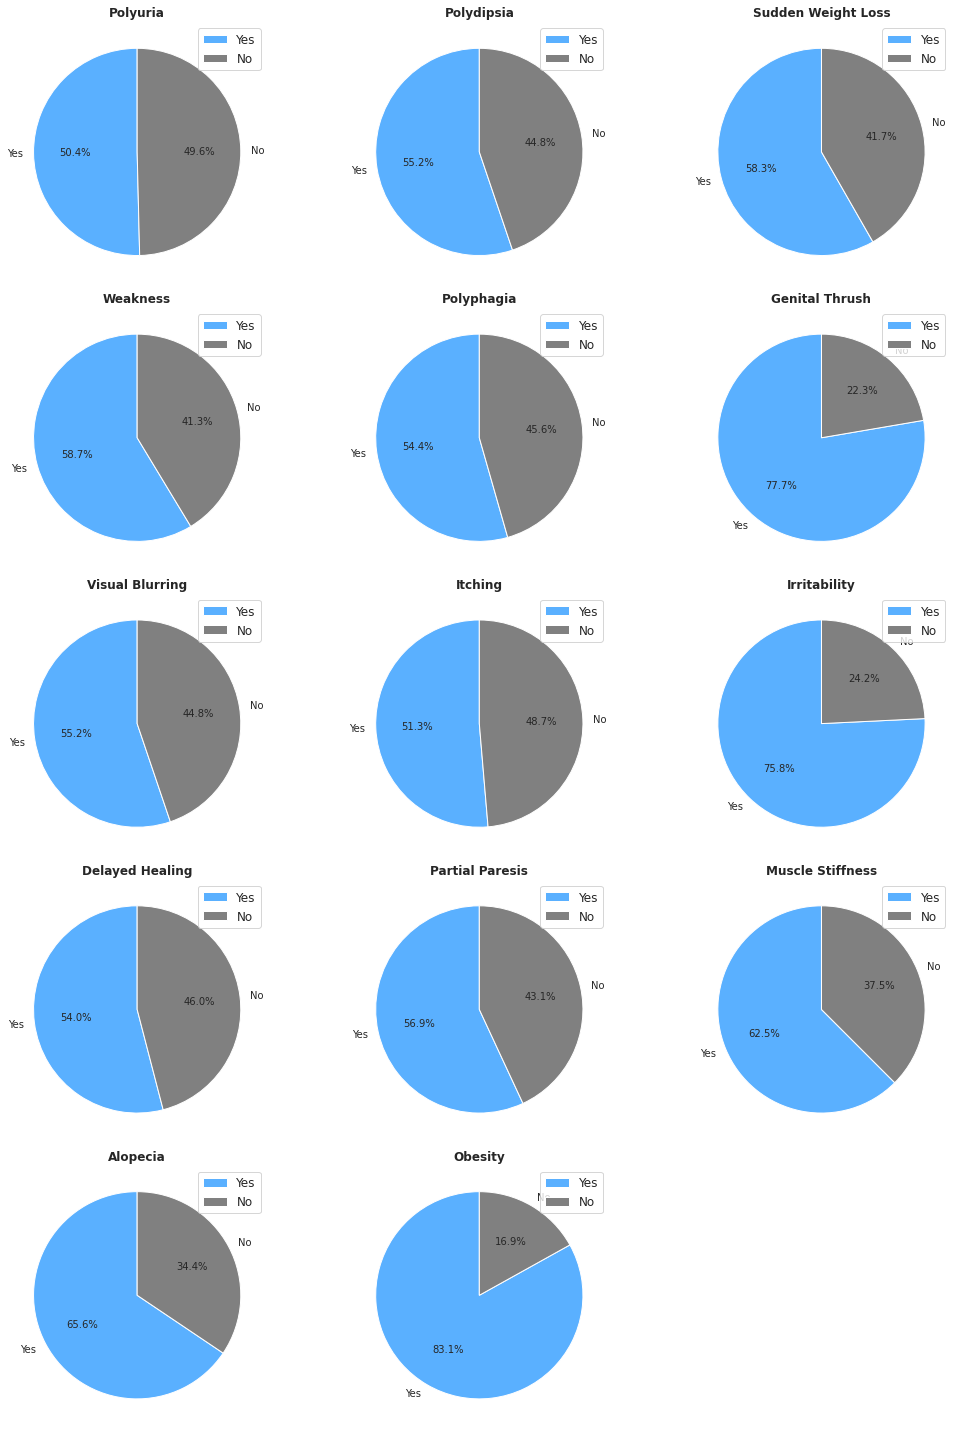

In [9]:
cou = 1
plt.figure(figsize=(15,20))
print('\n\n')
for i in df1.columns:
    if i not in ['class','Age','Gender','Age Group']:
        plt.subplot(5,3,cou)
        plt.title(f'{i.title()}',fontweight='bold',fontsize=14)
        cou += 1
        plt.tight_layout()
        df1[i].value_counts().plot(kind="pie",colors=[blue,'grey'],legend=True,labels=["Yes","No"],
        startangle=90,autopct='%1.1f%%')
        plt.ylabel('')
        plt.title(f'{i.title()}',fontweight='bold',fontsize=12)
        plt.legend(loc = "upper right",fontsize=12)
plt.tight_layout()  
plt.show()

---

### <div align = center> Correlation

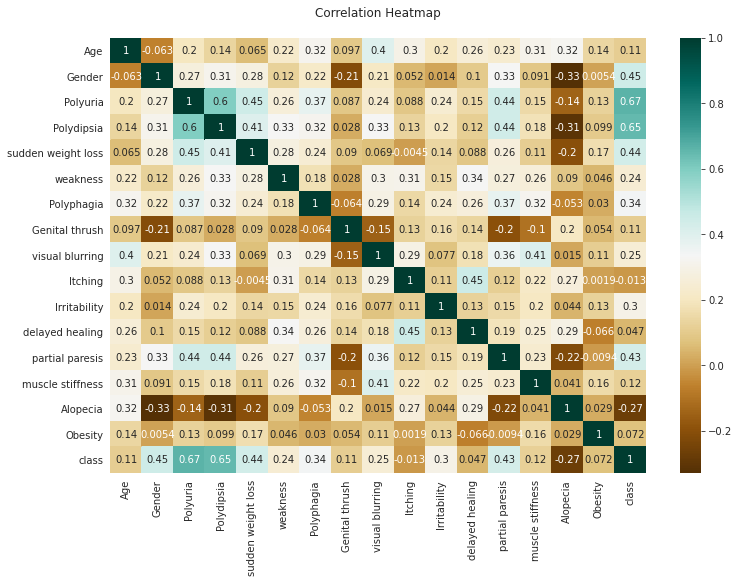

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='BrBG')
plt.title('Correlation Heatmap\n',fontsize= 12)
plt.show()

#### <div align=center>Polydipsia and Polyuria has some correlation

 **Polyuria** is a condition where the <font color = red>body urinates more than usual </font>and passes excessive or abnormally large amounts of urine each time you urinate. Polyuria is defined as the frequent passage of large volumes of urine – more than 3 litres a day compared to the normal daily urine output in adults of about 1 to 2 litres.

 **Polydipsia** is a medical name for the feeling of<font color =red> extreme thirstiness</font>. Polydipsia is often linked to urinary conditions that cause you to <font color = red>urinate a lot</font>. This can make your body feel a constant need to replace the fluids lost in urination. It can also be caused by physical processes that cause you to lose a lot of fluid.


---

### Analysing the age group

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


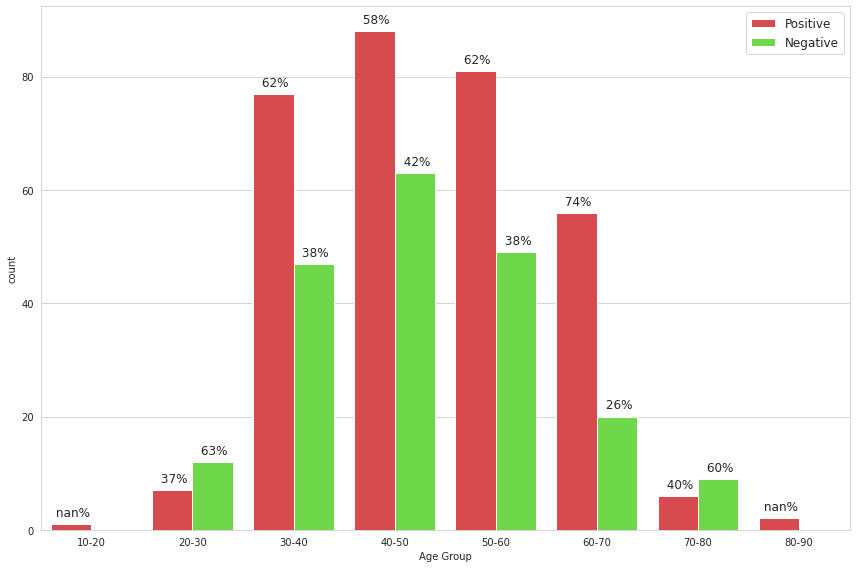

In [11]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Age Group", data=df1,hue="class",palette=[red,green],order=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        l_per = height_l/total
        r_per = height_r/total
        if l_per == np.nan:
            l_per = 100
        if r_per == np.nan:
            r_per = 100
        ax.text(left.get_x() + left.get_width()/2., height_l+2 , ' {0:.0%}'.format(l_per),va='center', ha="center",size=12)
        ax.text(right.get_x() + right.get_width()/2., height_r+2 , ' {0:.0%}'.format(r_per),va='center', ha="center",size=12)
plt.tight_layout()
# plt.title(f'\n\nAge Distribution\n',fontweight='bold',fontsize=14)
plt.legend(loc = "upper right",fontsize=12)
plt.show()

### Analysing the symptoms

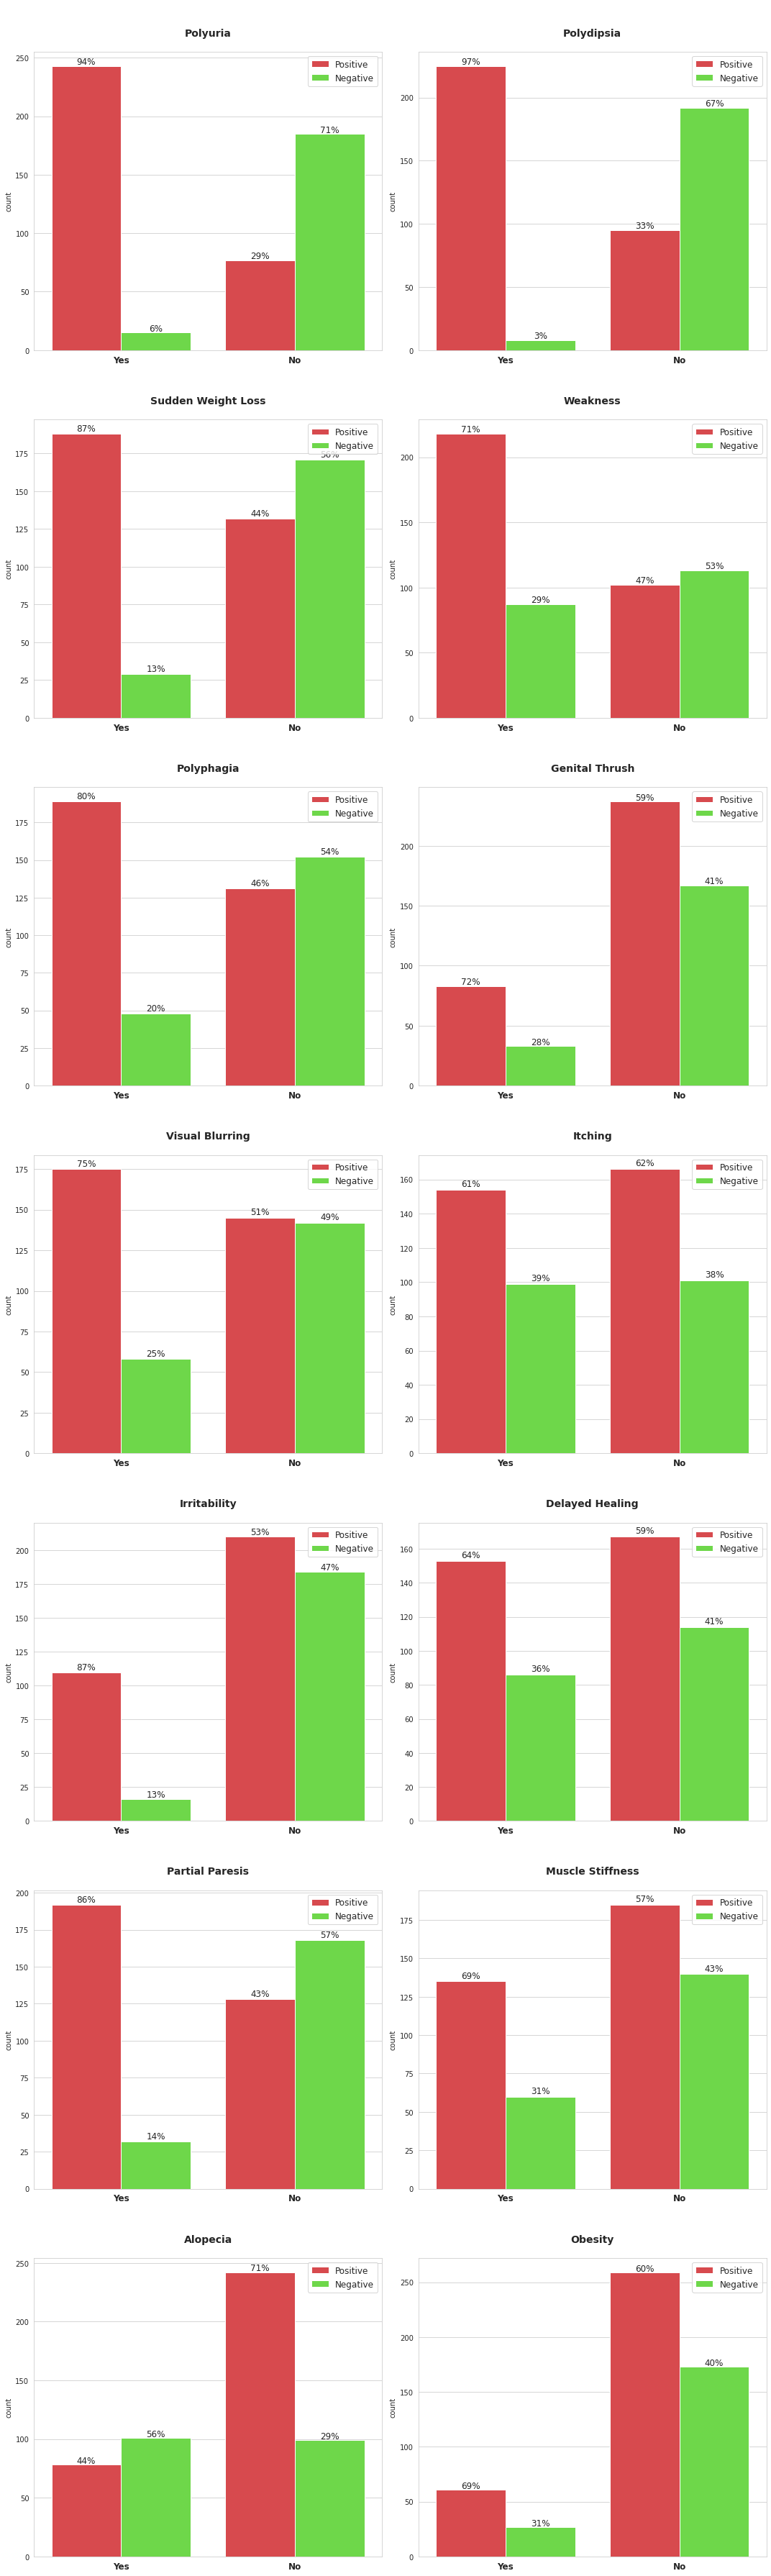

In [12]:
plt.figure(figsize=(15,50))
colt = ['Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia',
        'Genital thrush','visual blurring','Itching','Irritability','delayed healing',
        'partial paresis','muscle stiffness','Alopecia','Obesity']
pcol = []
for num,col in enumerate(colt): 
    plt.subplot(len(colt)/2,2,num+1,)
    ax = sns.countplot(x=col, data=df1,hue="class",palette=[red,green],order=['Yes','No'])
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        l_per = height_l/total
        r_per = height_r/total
        l_pert = '{0:.0}'.format(l_per)
        r_pert = '{0:.0}'.format(r_per)
        if l_pert >= '0.8': #checking and appending symptoms with high positve
            pcol.append(col)
        if r_per == np.nan:
            r_per = 100
        
        ax.text(left.get_x() + left.get_width()/2., height_l+3.5 , '{0:.0%}'.format(l_per),va='center', ha="center",size=12)
        ax.text(right.get_x() + right.get_width()/2., height_r+3.5 , '{0:.0%}'.format(r_per),va='center', ha="center",size=12)
    plt.tight_layout()
    plt.xlabel("")
    plt.xticks(fontsize=12,fontweight='bold')
    plt.title(f'\n\n{col.title()}\n',fontweight='bold',fontsize=14)
    plt.legend(loc = "upper right",fontsize=12)


In [13]:
pcol

['Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'Polyphagia',
 'visual blurring',
 'Irritability',
 'partial paresis']

### Major Symptoms where patients showed the symptom and was <font color =red>positively </font> tested for Diabetes


1. **Polyuria** is a condition where the <font color = red>body urinates more than usual </font>and passes excessive or abnormally large amounts of urine each time you urinate. Polyuria is defined as the frequent passage of large volumes of urine – more than 3 litres a day compared to the normal daily urine output in adults of about 1 to 2 litres.

2. **Polydipsia** is a medical name for the feeling of<font color =red> extreme thirstiness</font>. Polydipsia is often linked to urinary conditions that cause you to <font color = red>urinate a lot</font>. This can make your body feel a constant need to replace the fluids lost in urination. It can also be caused by physical processes that cause you to lose a lot of fluid.

3. **Paresis** involves the <font color =red>weakening of a muscle or group of muscles</font>. It may also be referred to as partial or mild paralysis. Unlike paralysis, people with paresis can still move their muscles. These movements are just weaker than normal.

4. **Polyphagia** also known as hyperphagia, is the medical term for excessive or <font color =red>extreme hunger</font>. It's different than having an increased appetite after exercise or other physical activity. While your hunger level will return to normal after eating in those cases, polyphagia won't go away if you eat more food.

5. **Sudden weight loss**

6. **Irritability**


#### <div align = center>\*\*\* End of EDA ***

---

 ### Splitting the dataset into training and testing sets


In [14]:
X = df.drop("class",axis=1)
Y = df["class"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

In [43]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


### Standardization of independant variables

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [16]:
X = scaler.fit_transform(X)

In [17]:
#importing scoring 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

   # <div align = center>Model Building</div>

## Logistic Regression

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [19]:
# penaltys = ['l2', 'none']
# for i in range(1,2000):
#     lr_model = LogisticRegression(penalty='l2',C=1,max_iter=4)
#     lr_model.fit(X_train,y_train)
#     pred = lr_model.predict(X_test)
#     scr =lr_model.score(X_test,y_test)
#     if scr >= 0.93:
#         print(i)
#         print(lr_model.score(X_test,y_test))
#         print(confusion_matrix(y_test,pred))


In [20]:
lr_model = LogisticRegression(penalty='l2',C=1,max_iter=4)
lr_model.fit(X_train,y_train)
pred = lr_model.predict(X_test)
lrscore = lr_model.score(X_test,y_test)

In [21]:
lrscore = lr_model.score(X_test,y_test)
lrcm = confusion_matrix(y_test,pred)
lrcr = classification_report(y_test,pred)
print('Logistic Regression')
print('*******************')
print('Testscore')
print('---------')
print(lrscore)
print('\n')
print('confusion Matrix')
print('----------------')
print(lrcm)
print('\n')
print('Classification Report')
print('---------------------')
print(lrcr)                        

Logistic Regression
*******************
Testscore
---------
0.936046511627907


confusion Matrix
----------------
[[ 59   2]
 [  9 102]]


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.87      0.97      0.91        61
           1       0.98      0.92      0.95       111

    accuracy                           0.94       172
   macro avg       0.92      0.94      0.93       172
weighted avg       0.94      0.94      0.94       172



## K Nearest Neighbour 

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
gs = {'n_neighbors':range(1,25)}
knn_param_search = GridSearchCV(knn,gs,cv=5)
knn_param_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 25)})

In [23]:
knn_param_search.best_params_
pred = knn_param_search.predict(X_test)

In [24]:
knnscore = knn_param_search.score(X_test,y_test)
knncm = confusion_matrix(y_test,pred)
knncr = classification_report(y_test,pred)
print('K Nearest Neighbour')
print('*******************')
print('Testscore')
print('---------')
print(knnscore)
print('\n')
print('confusion Matrix')
print('----------------')
print(knncm)
print('\n')
print('Classification Report')
print('---------------------')
print(knncr)        

K Nearest Neighbour
*******************
Testscore
---------
0.9709302325581395


confusion Matrix
----------------
[[ 61   0]
 [  5 106]]


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        61
           1       1.00      0.95      0.98       111

    accuracy                           0.97       172
   macro avg       0.96      0.98      0.97       172
weighted avg       0.97      0.97      0.97       172



## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt_model = DecisionTreeClassifier(random_state=10)

In [27]:
dt_model.fit(X_train,y_train)
pred = dt_model.predict(X_test)

In [28]:
dtscore = dt_model.score(X_test,y_test)
dtcm = confusion_matrix(y_test,pred)
dtcr = classification_report(y_test,pred)
print('Decision Tree')
print('*************')
print('Testscore')
print('---------')
print(dtscore)
print('\n')
print('confusion Matrix')
print('----------------')
print(dtcm)
print('\n')
print('Classification Report')
print('---------------------')
print(dtcr)        

Decision Tree
*************
Testscore
---------
0.9651162790697675


confusion Matrix
----------------
[[ 60   1]
 [  5 106]]


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        61
           1       0.99      0.95      0.97       111

    accuracy                           0.97       172
   macro avg       0.96      0.97      0.96       172
weighted avg       0.97      0.97      0.97       172



## Naïve Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)

In [30]:
nbscore = gnb.score(X_test,y_test)
nbcm = confusion_matrix(y_test,pred)
nbcr = classification_report(y_test,pred)
print('Naïve Bayes')
print('***********')
print('Testscore')
print('---------')
print(nbscore)
print('\n')
print('confusion Matrix')
print('----------------')
print(nbcm)
print('\n')
print('Classification Report')
print('---------------------')
print(nbcr)      

Naïve Bayes
***********
Testscore
---------
0.9069767441860465


confusion Matrix
----------------
[[ 54   7]
 [  9 102]]


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        61
           1       0.94      0.92      0.93       111

    accuracy                           0.91       172
   macro avg       0.90      0.90      0.90       172
weighted avg       0.91      0.91      0.91       172



## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=15)
rf_model.fit(X_train,y_train)
pred = gnb.predict(X_test)

In [32]:
rfscore = rf_model.score(X_test,y_test)
rfcm = confusion_matrix(y_test,pred)
rfcr = classification_report(y_test,pred)
print('Random Forest')
print('*************')
print('Testscore')
print('---------')
print(rfscore)
print('\n')
print('confusion Matrix')
print('----------------')
print(rfcm)
print('\n')
print('Classification Report')
print('---------------------')
print(rfcr)        

Random Forest
*************
Testscore
---------
0.9883720930232558


confusion Matrix
----------------
[[ 54   7]
 [  9 102]]


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        61
           1       0.94      0.92      0.93       111

    accuracy                           0.91       172
   macro avg       0.90      0.90      0.90       172
weighted avg       0.91      0.91      0.91       172



## Support Vector Machine

In [33]:
from sklearn.svm import SVC
kernels = ['linear','rbf','poly']
for i in kernels:  
    svm_model = SVC(kernel=i,C=2)
    svm_model.fit(X_train,y_train)
    print('For Kernel:',i)
    print('Accuracy is:',svm_model.score(X_test,y_test))

For Kernel: linear
Accuracy is: 0.9302325581395349
For Kernel: rbf
Accuracy is: 0.9709302325581395
For Kernel: poly
Accuracy is: 0.9767441860465116


In [34]:
for i in range(0,11):
    svm_model = SVC(kernel='poly',C=2,degree=i)
    svm_model.fit(X_train,y_train)
    print('For Degree:',i)
    print('Accuracy is:',svm_model.score(X_test,y_test))

For Degree: 0
Accuracy is: 0.6453488372093024
For Degree: 1
Accuracy is: 0.9302325581395349
For Degree: 2
Accuracy is: 0.8837209302325582
For Degree: 3
Accuracy is: 0.9767441860465116
For Degree: 4
Accuracy is: 0.9302325581395349
For Degree: 5
Accuracy is: 0.9825581395348837
For Degree: 6
Accuracy is: 0.9418604651162791
For Degree: 7
Accuracy is: 0.9883720930232558
For Degree: 8
Accuracy is: 0.9418604651162791
For Degree: 9
Accuracy is: 0.9883720930232558
For Degree: 10
Accuracy is: 0.9302325581395349


In [35]:
svm_model = SVC(kernel='poly',C=2,degree=7)
svm_model.fit(X_train,y_train)
pred = svm_model.predict(X_test)
svm_model.score(X_test, y_test)

0.9883720930232558

In [36]:
svmscore = svm_model.score(X_test,y_test)
svmcm = confusion_matrix(y_test,pred)
svmcr = classification_report(y_test,pred)
print('Support Vector Machine')
print('**********************')
print('Testscore')
print('---------')
print(svmscore)
print('\n')
print('confusion Matrix')
print('----------------')
print(svmcm)
print('\n')
print('Classification Report')
print('---------------------')
print(svmcr)        

Support Vector Machine
**********************
Testscore
---------
0.9883720930232558


confusion Matrix
----------------
[[ 59   2]
 [  0 111]]


Classification Report
---------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        61
           1       0.98      1.00      0.99       111

    accuracy                           0.99       172
   macro avg       0.99      0.98      0.99       172
weighted avg       0.99      0.99      0.99       172



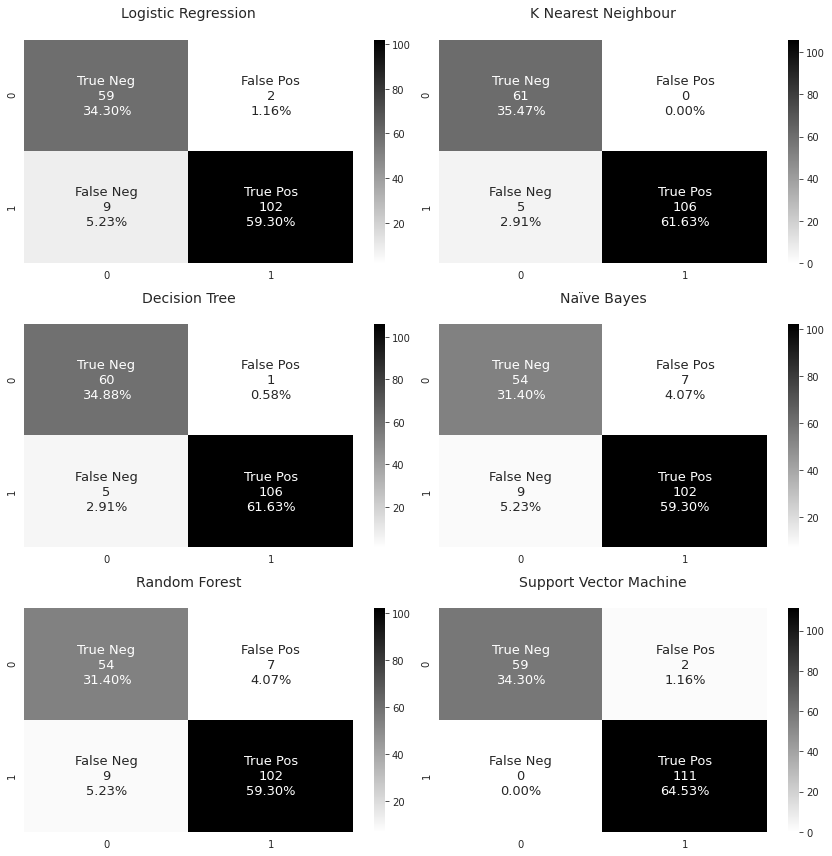

In [37]:
plt.figure(figsize=(12,12))
cmtitl = ['Logistic Regression','K Nearest Neighbour','Decision Tree','Naïve Bayes','Random Forest','Support Vector Machine']
cms = [lrcm,knncm,dtcm,nbcm,rfcm,svmcm]
num=0
for x in cms:
    plt.subplot(3,2,num+1,)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in x.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in x.flatten()/np.sum(svmcm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in   zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(x, annot=labels, annot_kws={"fontsize":13}, fmt='', cmap='binary')
    plt.title(f'{cmtitl[num]}\n',fontsize=14)
    num += 1
    plt.tight_layout()
plt.show()

In [38]:
for i,x in enumerate([lrcr,knncr,dtcr,nbcr,rfcr,svmcr]):
    print(cmtitl[i],':',x.split('.')[3][:2])

Logistic Regression : 91
K Nearest Neighbour : 96
Decision Tree : 95
Naïve Bayes : 87
Random Forest : 87
Support Vector Machine : 98


   ### <div align =center> KNN AND SVM has the best postive F1 Score </div>

In [39]:
X

array([[-0.6613669 , -0.76509206, -0.99233705, ...,  1.29099445,
         1.38022749,  2.21564684],
       [ 0.82136224, -0.76509206, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.57899306, -0.76509206,  1.00772212, ...,  1.29099445,
         1.38022749, -0.45133547],
       ...,
       [ 0.82136224,  1.30703226,  1.00772212, ...,  1.29099445,
        -0.72451824,  2.21564684],
       [-1.32035762,  1.30703226, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.49661921, -0.76509206, -0.99233705, ..., -0.77459667,
        -0.72451824, -0.45133547]])

In [40]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
score = cross_val_score(svm_model,X,Y,cv=10)
score

array([0.98076923, 0.88461538, 0.98076923, 1.        , 0.86538462,
       0.98076923, 1.        , 1.        , 1.        , 1.        ])